In [15]:
using Random
using Plots
using Statistics
using LinearAlgebra
using Distributions
using LaTeXStrings

┌ Info: Precompiling LaTeXStrings [b964fa9f-0449-5b57-a5c2-d3ea65f4040f]
└ @ Base loading.jl:1273


In [2]:
p = 10000
N = 10000
ω = 1.0
ρ = 0.05

function spikedmodel(ξ::Array{Float64, 2}, ω::Float64, ρ::Float64)
    p = size(ξ)[end]
    
    function gen(N::Int)
        C = randn(Float64, (N, 1))
        A = randn(Float64, (N, p))
        sqrt(ω/p) * C .* ξ, A
    end
end

# as p → ∞ norm(ξ) → √p why?
ξ = rand(Bernoulli(ρ), (1, p)) / sqrt(ρ)
model = spikedmodel(ξ, ω, ρ);

In [3]:
Y, A = model(N)
λ_y = eigvals(cov(Y))
λ_a = eigvals(cov(A));

10000-element Array{Float64,1}:
 -8.589477923048928e-17
  3.3346422858792786e-9
  4.153958863735069e-8 
  2.3512027526889947e-7
  2.5199013248606914e-7
  4.1244737700236384e-7
  9.373024276257017e-7 
  1.4515386488087092e-6
  2.268465370510671e-6 
  2.3452681825144347e-6
  2.5803187657648867e-6
  3.1739203242013802e-6
  3.415983406532761e-6 
  ⋮                    
  3.9239961845838867   
  3.9253552600097463   
  3.9341218474101796   
  3.936817548913359    
  3.9407324224810476   
  3.9479806785542197   
  3.9511524315425066   
  3.9598640806082      
  3.9678434750364673   
  3.9713102763874284   
  3.981398890207598    
  3.9982635521768475   

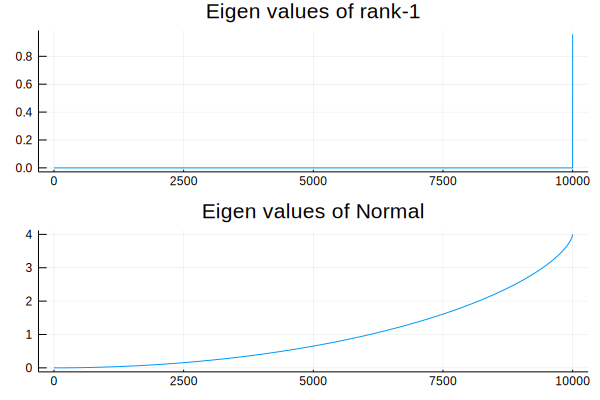

In [21]:
p1 = plot(λ_y, title="Eigen values of rank-1")
p2 = plot(λ_a, title="Eigen values of Normal")
plot(p1, p2, layout=(2, 1), leg=false)